## Lab 07
### LAKSHITA SETHI
### 21BDA54

### Q1. Have you come across Grid Search Cross Validation? Fit any two models covered in previous classes and optimize them using Grid search CV.

In [1]:
# We know cross validation is to split our dataset into two parts, so as to check or validate our trained data, as how far 
# does it works properly. Simply we do it by splitting the data into 70% and 30%, where the former is for training and the
# latter is for testing.
# In grid Search, we use a method to find the best combination of hyper-parameters. As in the best combination of 70-30% 
# split. 

In [74]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
!pip install opencv-python

In [3]:
data = pd.read_csv(r"C:\Users\91999\Downloads\archive\b_cancer.csv")

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.shape

(569, 33)

In [7]:
data.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


In [8]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
# We are considering "Diagnosis" as our target variable.

In [10]:
y = data.loc[:,"diagnosis"].values

In [11]:
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [12]:
X = data.drop(["diagnosis","id","Unnamed: 32"], axis = 1)

In [13]:
type(X)

pandas.core.frame.DataFrame

In [14]:
X.shape

(569, 30)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [16]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,stratify=y,random_state=0)

In [18]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
123,14.50,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,0.1856,0.06402,...,15.70,15.98,102.8,745.5,0.13130,0.1788,0.2560,0.12210,0.2889,0.08006
287,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.4,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
129,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.25450,0.11490,0.2202,0.06113,...,22.63,33.58,148.7,1589.0,0.12750,0.3861,0.5673,0.17320,0.3305,0.08465
385,14.60,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,0.1627,0.05416,...,15.79,31.71,102.2,758.2,0.13120,0.1581,0.2675,0.13590,0.2477,0.06836
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.98,34.12,126.7,1124.0,0.11390,0.3094,0.3403,0.14180,0.2218,0.07820


In [19]:
X_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
468,17.60,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.10020,0.1696,0.07369,...,21.57,28.87,143.60,1437.0,0.1207,0.4785,0.5165,0.19960,0.2301,0.12240
221,13.56,13.90,88.59,561.3,0.10510,0.11920,0.07860,0.04451,0.1962,0.06303,...,14.98,17.13,101.10,686.6,0.1376,0.2698,0.2577,0.09090,0.3065,0.08177
93,13.45,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,0.1638,0.05710,...,15.10,25.94,97.59,699.4,0.1339,0.1751,0.1381,0.07911,0.2678,0.06603
240,13.64,15.60,87.38,575.3,0.09423,0.06630,0.04705,0.03731,0.1717,0.05660,...,14.85,19.05,94.11,683.4,0.1278,0.1291,0.1533,0.09222,0.2530,0.06510
128,15.10,16.39,99.58,674.5,0.11500,0.18070,0.11380,0.08534,0.2001,0.06467,...,16.11,18.33,105.90,762.6,0.1386,0.2883,0.1960,0.14230,0.2590,0.07779


In [20]:
y_train

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [21]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0])

## Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [24]:
# Checking the accuracy score

In [25]:
from sklearn.metrics import accuracy_score
tree_train = accuracy_score(y_train,y_train_pred)

In [26]:
tree_train = accuracy_score(y_train,y_train_pred)

In [27]:
print(tree_train*100)

100.0


In [28]:
tree_test = accuracy_score(y_test,y_test_pred)

In [29]:
print(tree_test*100)

95.1048951048951


In [30]:
# It's an overfitting model.

In [31]:
# Let's try with max_depth as 2

In [32]:
dt1 = DecisionTreeClassifier(max_depth=2, random_state=42)
dt1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [33]:
y_train_pred1 = dt1.predict(X_train)
y_test_pred1 = dt1.predict(X_test)

In [34]:
tree_train1 = accuracy_score(y_train,y_train_pred1)

In [35]:
print(tree_train1*100)

95.07042253521126


In [36]:
tree_test1 = accuracy_score(y_test,y_test_pred1)

In [37]:
print(tree_test1*100)

92.3076923076923


In [38]:
# Hence the model isn't overfotted now.
# But it's good that we try with different values of max_depth and check for the best value.

In [39]:
from sklearn.model_selection import GridSearchCV
dt2 = DecisionTreeClassifier(random_state=42)
parameters = {"max_depth":[1,2,3,4,5,7,10],
              "min_samples_leaf":[1,3,6,10,20]}
clf = GridSearchCV(dt2,parameters, n_jobs=1)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'max_depth': 3, 'min_samples_leaf': 1}


In [40]:
y_train_pred2 = clf.predict(X_train)
y_test_pred2 = clf.predict(X_test)
tree_train2 = accuracy_score(y_train,y_train_pred2)
tree_test2 = accuracy_score(y_test, y_test_pred2)

In [41]:
print("Train accuracy: ",tree_train2)
print("Test accuracy: ",tree_test2)

Train accuracy:  0.9741784037558685
Test accuracy:  0.958041958041958


In [42]:
# Hence we can say that the accuracy of our model, now is better.

### Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

In [44]:
# Finding confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix

In [45]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)

[[85  5]
 [ 1 52]]


In [46]:
print(rf_acc_score*100)

95.8041958041958


In [47]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [48]:
clf_r = RandomForestClassifier()
parametres={'criterion':['gini'],
            'n_estimators':[150],
           'max_depth':[12],
            'min_samples_split':[8],
            'min_samples_leaf':[2]}
grid_search_cv_clf = GridSearchCV(clf_r,parametres,cv=5)
grid_search_cv_clf.fit(X_train,y_train)
best_clf_r = grid_search_cv_clf.best_estimator_
y_pred2 = best_clf_r.predict(X_test)
print(classification_report(y_test,y_pred2, zero_division=1))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97        90
           1       0.91      0.98      0.95        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [49]:
grid_search_cv_clf.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 150}

### * * *

### Q2. What is Stride, Padding & Pooling? Explain with an example.

##### STRIDE:
When computing the cross-correlation, we start with the convolution window at the upper-left corner of the input tensor, and then slide it over all locations both down and to the right.
We refer to the number of rows and columns traversed per slide as the stride.
The stride can reduce the resolution of the output, for example reducing the height and width of the output to only 1/n of the height and width of the input (n is an integer greater than 1).
shows a two-dimensional cross-correlation operation with a stride of 3 vertically and 2 horizontally. The shaded portions are the output elements as well as the input and kernel tensor elements used for the output computation: 0×0+0×1+1×2+2×3=8, 0×0+6×1+0×2+0×3=6. We can see that when the second element of the first column is outputted, the convolution window slides down three rows. The convolution window slides two columns to the right when the second element of the first row is outputted. When the convolution window continues to slide two columns to the right on the input, there is no output because the input element cannot fill the window (unless we add another column of padding).
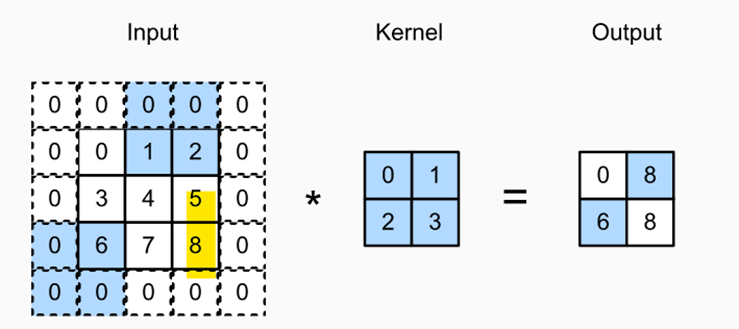
##### PADDING:
One tricky issue when applying convolutional layers is that we tend to lose pixels on the perimeter of our image. Since we typically use small kernels, for any given convolution, we might only lose a few pixels, but this can add up as we apply many successive convolutional layers. One straightforward solution to this problem is to add extra pixels of filler around the boundary of our input image, thus increasing the effective size of the image. Typically, we set the values of the extra pixels to zero.
 In the figure, we pad a 3×3 input, increasing its size to 5×5. The corresponding output then increases to a 4×4 matrix. The shaded portions are the first output element as well as the input and kernel tensor elements used for the output computation: 0×0+0×1+0×2+0×3=0.
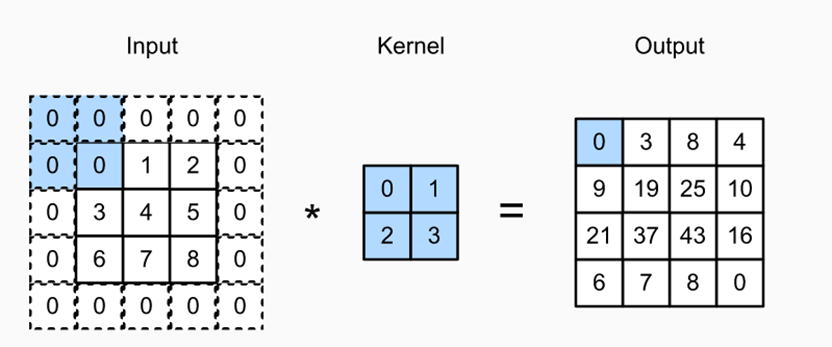
##### POOLING:
The pooling operation involves sliding a two-dimensional filter over each channel of feature map and summarising the features lying within the region covered by the filter. 
Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network.
The pooling layer summarises the features present in a region of the feature map generated by a convolution layer. So, further operations are performed on summarised features instead of precisely positioned features generated by the convolution layer. This makes the model more robust to variations in the position of the features in the input image. 
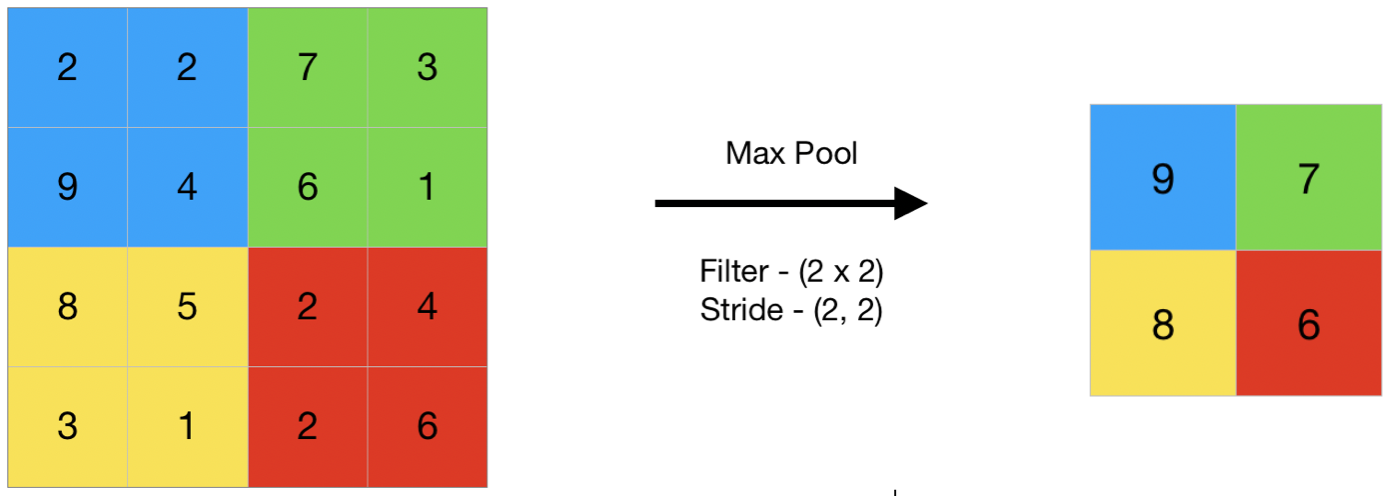

Ref: https://medium.com/analytics-vidhya/convolution-padding-stride-and-pooling-in-cnn-13dc1f3ada26

### * * *

### Q3. Fit a CNN model on the dataset which has been assigned to you. Print a classification report to see the model metrics on train and test datasets.

In [85]:
import os
import random
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torchvision import datasets, transforms, models 
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid

In [115]:
img = r'C:/Users/91999/Downloads/mobile_images/mobile_images/mobile_images/'

In [116]:
labels=pd.read_csv(r'C:\Users\91999\Downloads\mobile_images\mobile_data_img.csv')
labels

,Label,Model,Brand,Condition,Image_File
0,apple iphone 7 portroid (used),iPhone 7,Apple,Used,mobile_images/1635051927882_Apple iPhone 7 Por...
1,apple iphone 6s 128gb (used),iPhone 6S,Apple,Used,mobile_images/1635051928230_Apple iPhone 6S 12...
2,samsung galaxy m02 (used),Galaxy M02,Samsung,Used,mobile_images/1635051928415_Samsung Galaxy M02...
3,lg q92 5g black snapdragon (new),Q92,LG,New,mobile_images/1635051928611_LG Q92 5G Black Sn...
4,apple iphone 7 128gb (used),iPhone 7,Apple,Used,mobile_images/1635051928818_Apple iPhone 7 128...
...,...,...,...,...,...
51190,apple iphone 13 pro max 1tb (new),iPhone 13 Pro Max,Apple,New,mobile_images/1639542673259_Apple iPhone 13 Pr...
51191,huawei y6p 4gb/128gb (new),Y6p,Huawei,New,mobile_images/1639542673613_Huawei Y6p 4GB128G...
51192,google pixel 3 (used),Pixel,Google,Used,mobile_images/1639542673905_Google Pixel 3 Use...
51193,samsung galaxy a12 4/64gb (new),Galaxy A12,Samsung,New,mobile_images/1639542674104_Samsung Galaxy A12...


In [117]:
Name = labels['Label'].unique().tolist()
#print(Name)
print(len(Name))

14616


In [118]:
N=list(range(len(Name)))    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name))

In [119]:
labels['o/p']=labels['Label'].map(normal_mapping)

In [120]:
labels['o/p']

0            0
1            1
2            2
3            3
4            4
         ...  
51190     4869
51191    14614
51192      912
51193     1641
51194    14615
Name: o/p, Length: 51195, dtype: int64

In [121]:
files = labels['Image_File'].unique().tolist()
print(files[0:10])
print(len(files))

['mobile_images/1635051927882_Apple iPhone 7 Portroid Used for sale.jpg', 'mobile_images/1635051928230_Apple iPhone 6S 128GB Used for sale.jpg', 'mobile_images/1635051928415_Samsung Galaxy M02 Used for sale.jpg', 'mobile_images/1635051928611_LG Q92 5G Black Snapdragon New for sale.jpg', 'mobile_images/1635051928818_Apple iPhone 7 128GB Used for sale.jpg', 'mobile_images/1635051929034_Samsung Galaxy M02 2GB Ram32GB memory New for sale.jpg', 'mobile_images/1635051929290_Apple iPhone 7 32GB Used for sale.jpg', 'mobile_images/1635051929498_Samsung Galaxy J2 Used for sale.jpg', 'mobile_images/1635051929715_Apple iPhone 7 Plus 128GB  Black Used for sale.jpg', 'mobile_images/1635051929922_Huawei Nova 7i 8GB  128 GB Used for sale.jpg']
51195


In [122]:
dataset=[]
i=0
for i in range(len(labels)):
    labeli=labels.loc[i,'o/p']
    filei=labels.loc[i,'Image_File']
    path=os.path.join(img,filei)
    print(path)
    img1=cv2.imread(path)
    img2=cv2.resize(img1,dsize=(150,150),interpolation=cv2.INTER_CUBIC)
    img3=img2.astype(np.float32)
    image=torch.from_numpy(img3)
    dataset+=[[image,labeli]]

C:/Users/91999/Downloads/mobile_images/mobile_images/mobile_images/mobile_images/1635051927882_Apple iPhone 7 Portroid Used for sale.jpg


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


### * * *

### Q4. What is overfitting? How to overcome overfitting in an ML model?

##### OVERFITTING
We can understand overfitting better by looking at the opposite problem, underfitting.
Underfitting occurs when a model is too simple – informed by too few features or regularized too much – which makes it inflexible in learning from the dataset.
Assume we train a model from a dataset of 10,000 resumes and their outcomes.
Next, we try the model out on the original dataset, and it predicts outcomes with 99% accuracy… wow!
But now comes the bad news.
When we run the model on a new (“unseen”) dataset of resumes, we only get 50% accuracy… uh-oh!
Our model doesn’t generalize well from our training data to unseen data.
This is known as overfitting.

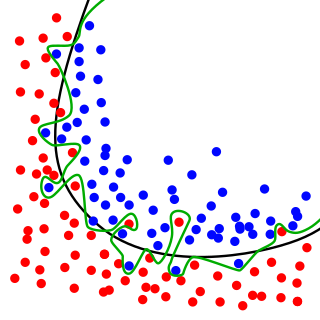

When the model learns too much of the training dataset. And when it faces any new features other than that in the training dataset, it isn't able to make accurate conclusions.
A key challenge with overfitting, and with machine learning in general, is that we can’t know how well our model will perform on new data until we actually test it.
This method can approximate of how well our model will perform on new data.
If our model does much better on the training set than on the test set, then we’re likely overfitting.
##### Here are a few of the most popular solutions for overfitting:
1. Cross-validation
2. Train with more data
3. Remove features
4. Early stopping
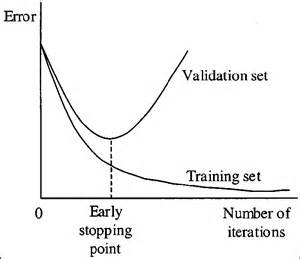
5. Regularization
6. Ensembling

Ref: https://elitedatascience.com/overfitting-in-machine-learning